In [ ]:
%matplotlib inline

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive
Mounted at /content/drive


In [ ]:
import sys
S7_PROJECT_PATH = '/content/drive/MyDrive/CVMODEL/ResNet18/ResNet18/'
sys.path.append(S7_PROJECT_PATH)
import os
#os.chdir(S7_PROJECT_PATH+'/Model/')

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

In [ ]:
sys.path.append ('/content/drive/MyDrive/CVMODEL/ResNet18/ResNet18/TransForm/')
from datatransform import Transforms

common_transforms = Transforms(normalize=False, mean=None, stdev=None)


In [ ]:
sys.path.append ('/content/drive/MyDrive/CVMODEL/ResNet18/ResNet18/DataLoader/')
from getdata import DataLoader
from torchvision import datasets, transforms
trainset = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=common_transforms.train_transforms())
# Downloading Testset
testset = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=common_transforms.test_transforms())

# Calculating Mean and Std dev
# We'd need to convert it into Numpy! Remember above we have converted it into tensors already
train_data = trainset.data
#train_data = trainset.transform(train_data.numpy())

test_data = testset.data

full_data = np.concatenate((train_data, test_data),axis=0)

full_data.reshape(-1,full_data.shape[-1])

mean=full_data.reshape(-1,full_data.shape[-1]).mean(0)/255

std=full_data.reshape(-1,full_data.shape[-1]).std(0)/255

print(full_data[0].shape)
print(mean)
print(std)


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
(32, 32, 3)
[0.49186878 0.48265391 0.44717728]
[0.24697121 0.24338894 0.26159259]


In [ ]:
SEED = 1

updated_transforms= Transforms(normalize=True, mean=(0.49186878, 0.48265391, 0.44717728), stdev=(0.24697121, 0.24338894, 0.26159259))

# Downloading TrainSet
trainset = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=updated_transforms.train_transforms())

# Downloading Testset
testset = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=updated_transforms.test_transforms())

# Creating object of a class
dataloader= DataLoader(shuffle=True, batch_size=64, seed=SEED, num_workers=2, pin_memory=True)


# train data loader
trainloader = dataloader.load(trainset)

# test data loader
testloader = dataloader.load(testset)

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane  bird  frog  bird


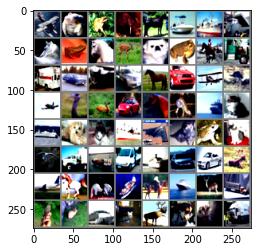

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
sys.path.append('/content/drive/MyDrive/CVMODEL/ResNet18/ResNet18/Model/')
from model import Resnet_Architecture
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Resnet_Architecture(Model_Layers=18).to(device)


summary(model,input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [ ]:

import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR
Loss="CrossEntropyLoss"
EPOCHS = 25
model.device=dataloader.device
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
model.gotrain(optimizer=optimizer, train_loader=trainloader, test_loader=testloader, epochs=EPOCHS, statspath=S7_PROJECT_PATH+"Save_Model", scheduler=None, batch_scheduler=False, L1lambda=0, LossType=Loss)


Validation loss decreased (100000.000000 --> 1.220771).  Saving model ...
Epoch: 1, Train set: Average loss: 0.0002, Accuracy: 99.59%; Test set: Average loss: 1.2208, Accuracy: 83.34%



Validation loss decreased (1.220771 --> 1.160111).  Saving model ...
Epoch: 2, Train set: Average loss: 0.0003, Accuracy: 99.35%; Test set: Average loss: 1.1601, Accuracy: 82.95%



Epoch: 3, Train set: Average loss: 0.0003, Accuracy: 99.44%; Test set: Average loss: 1.1841, Accuracy: 83.12%



Validation loss decreased (1.160111 --> 1.144987).  Saving model ...
Epoch: 4, Train set: Average loss: 0.0002, Accuracy: 99.68%; Test set: Average loss: 1.1450, Accuracy: 83.55%



Epoch: 5, Train set: Average loss: 0.0001, Accuracy: 99.84%; Test set: Average loss: 1.1480, Accuracy: 84.18%



Validation loss decreased (1.144987 --> 1.136266).  Saving model ...
Epoch: 6, Train set: Average loss: 0.0000, Accuracy: 99.93%; Test set: Average loss: 1.1363, Accuracy: 84.57%



Validation loss decreased (1.136266 --> 1.070626).  Saving model ...
Epoch: 7, Train set: Average loss: 0.0000, Accuracy: 99.98%; Test set: Average loss: 1.0706, Accuracy: 85.34%



Epoch: 8, Train set: Average loss: 0.0000, Accuracy: 100.00%; Test set: Average loss: 1.0857, Accuracy: 85.42%



Validation loss decreased (1.070626 --> 1.056585).  Saving model ...
Epoch: 9, Train set: Average loss: 0.0000, Accuracy: 100.00%; Test set: Average loss: 1.0566, Accuracy: 85.43%



Epoch: 10, Train set: Average loss: 0.0000, Accuracy: 100.00%; Test set: Average loss: 1.0904, Accuracy: 85.47%



Epoch: 11, Train set: Average loss: 0.0000, Accuracy: 100.00%; Test set: Average loss: 1.0772, Accuracy: 85.58%



Epoch: 12, Train set: Average loss: 0.0000, Accuracy: 99.96%; Test set: Average loss: 1.1549, Accuracy: 84.64%



Epoch: 13, Train set: Average loss: 0.0000, Accuracy: 99.96%; Test set: Average loss: 1.1362, Accuracy: 85.09%



Epoch: 14, Train set: Average loss: 0.0000, Accuracy: 99.98%; Test set: Average loss: 1.1831, Accuracy: 85.26%



Epoch: 15, Train set: Average loss: 0.0000, Accuracy: 100.00%; Test set: Average loss: 1.1348, Accuracy: 85.37%



Epoch: 16, Train set: Average loss: 0.0000, Accuracy: 100.00%; Test set: Average loss: 1.1141, Accuracy: 85.23%



Epoch: 17, Train set: Average loss: 0.0000, Accuracy: 100.00%; Test set: Average loss: 1.1367, Accuracy: 85.65%



Epoch: 18, Train set: Average loss: 0.0000, Accuracy: 100.00%; Test set: Average loss: 1.1203, Accuracy: 85.69%



Epoch: 19, Train set: Average loss: 0.0000, Accuracy: 99.98%; Test set: Average loss: 1.1907, Accuracy: 85.27%



Epoch: 20, Train set: Average loss: 0.0000, Accuracy: 99.99%; Test set: Average loss: 1.1886, Accuracy: 85.01%



Epoch: 21, Train set: Average loss: 0.0000, Accuracy: 100.00%; Test set: Average loss: 1.1752, Accuracy: 85.54%



Epoch: 22, Train set: Average loss: 0.0000, Accuracy: 100.00%; Test set: Average loss: 1.1538, Accuracy: 85.36%



Epoch: 23, Train set: Average loss: 0.0000, Accuracy: 100.00%; Test set: Average loss: 1.1380, Accuracy: 85.70%



Epoch: 24, Train set: Average loss: 0.0000, Accuracy: 100.00%; Test set: Average loss: 1.1262, Accuracy: 85.34%



Epoch: 25, Train set: Average loss: 0.0000, Accuracy: 100.00%; Test set: Average loss: 1.1552, Accuracy: 85.49%



3. Define a Loss function and optimizer
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Let's use a Classification Cross-Entropy loss and SGD with momentum.



4. Train the network
^^^^^^^^^^^^^^^^^^^^

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



5. Test the network on the test data
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



Okay, now let us see what the neural network thinks these examples above are:



The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



The results seem pretty good.

Let us look at how the network performs on the whole dataset.



That looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:

